#### MNIST training with different hidden layer size

In this exercise we will see how the hidden layer size affects on the test accuracy and test loss of a MNIST  Deep Neural Network classifier.

Use matplotlib to plot the test accuracy vs sizes and test loss vs sizes

You should be able to complete this using the MNIST classifier we built in the last meeting.

In [63]:
# import functions:
import matplotlib.pyplot as plt

import keras
from keras.layers import Dense, Flatten, Reshape
from keras.models import Model
from keras.models import Sequential
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.utils import to_categorical

In [64]:
# write a function to construct model with hidden layer defined by the size function
def make_model(size):
    model = Sequential()
    model.add(Reshape((784,), input_shape=(28,28)))
    #Add code here:
    model.add(Dense(size, activation = 'relu'))
    model.add(Dense(size, activation = 'softmax'))
    return model

In [65]:
sizes = [256,512,784,1024] # create a list of sizes you want to experiment with
test_loss = [] # create array to store  test loss 
test_accuracy = [] # create array to store test accuracy

In [66]:
# load MNIST data:
(x_train, y_train), (x_test,y_test) = mnist.load_data()
#x_train = x_train.reshape(x_train.shape[0],28,28,1)
#x_test = x_test.reshape(x_test.shape[0],28,28,1)

# convert the range of values of train and test images from 0 to 255 to 0 to 1:
x_train = x_train.astype('float64')/255
x_test = x_test.astype('float64')/255

# use to_categorical to convert integer labels to logits:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [67]:
for size in sizes:
    print("Size: ", size)
    my_model = make_model(size)
    # compile model  with optimizer='sgd' loss='categorical_crossentropy'  metrics=['accuracy']):
    my_model.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['accuracy'])
    # fit model with  epochs=10, batch_size=64:
    history = my_model.fit(x_train, y_train, epochs=10, shuffle='batch',batch_size=64)
    # evaluate model to get test loss and test accuracy:
    t_loss, t_accuracy = my_model.evaluate(x_test,y_test)
    print("Test Accuracy ", t_accuracy)
    print("Test Loss ",t_loss)
    # append the test loss and test accuracy to the arrays we created earlier:
    test_loss.append(t_loss)
    test_accuracy.append(t_accuracy)

Size:  256
Epoch 1/10
60000/60000 [==============================] - 7s 111us/step - loss: 0.8145 - acc: 0.8056
Epoch 2/10
60000/60000 [==============================] - 7s 113us/step - loss: 0.4086 - acc: 0.8893
Epoch 3/10
60000/60000 [==============================] - 8s 127us/step - loss: 0.3480 - acc: 0.9032
Epoch 4/10
60000/60000 [==============================] - 12s 207us/step - loss: 0.3161 - acc: 0.9112
Epoch 5/10
60000/60000 [==============================] - 12s 193us/step - loss: 0.2939 - acc: 0.9172
Epoch 6/10
60000/60000 [==============================] - 9s 151us/step - loss: 0.2760 - acc: 0.9226
Epoch 7/10
60000/60000 [==============================] - 12s 198us/step - loss: 0.2612 - acc: 0.92701s - l
Epoch 8/10
60000/60000 [==============================] - 11s 189us/step - loss: 0.2478 - acc: 0.9310
Epoch 9/10
60000/60000 [==============================] - 13s 221us/step - loss: 0.2362 - acc: 0.9344
Epoch 10/10
10000/10000 [==============================] - 2s 182us/s

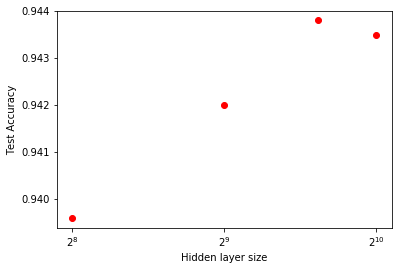

In [68]:
plt.figure()
plt.xscale('log', basex=2)
plt.ylabel('Test Accuracy')
plt.xlabel('Hidden layer size')
plt.plot(sizes, test_accuracy, 'ro')

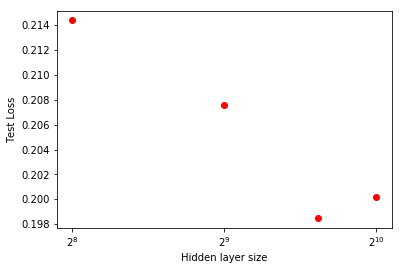

In [69]:
plt.figure()
plt.xscale('log', basex=2)
plt.ylabel('Test Loss')
plt.xlabel('Hidden layer size')
plt.plot(sizes, test_loss, 'ro')